Brief Homework 1
----------------------

In class, we looked at data and analysis around the death toll from Hurricane Maria. We ended the session looking at crime statistics from the FBI's Uniform Crime Reporting Program. Review that notebook before starting this assignment to refresh yourself on the syntax that R uses. The data we start with for this homework comes from the Major Cities Chiefs Association which has been surveying its members to get a sense of where crime is headed. Their report is here -- [MCCA Violent Crime Statistics](https://assets.documentcloud.org/documents/3023302/MCCA-Violent-Crime-Data-Midyear-2016-2015-8716.pdf). 

This little homework was part of a story by Tom Meagher and Gabe Dance at The Marshall Project. Have a look at thier [Crime in Context](https://www.themarshallproject.org/2016/08/18/crime-in-context) to see where these simple tools proved helpful. Read it over and take note of the kinds of statitics used in the story. 

The data we need is in a PDF table. PDF (the Portable Document Format) is really good for representing data to a printer -- creating a standard like this was a huge deal when PDF was introduced. Often, however, it becomes a vehicle for publishing data and then you start to see its weaknesses. Extracting data from a PDF will depend, first, on the kind of PDF it is. If you can "select" text from the document, you're in luck. There are several tools to help you get reasonably close to the data. If, on the other hand, your pages are essentially images, well, then you have to rely on "optical character recognition" programs that cluster black and white pixels, say, into letters and words and sentences. 

I used [Tabula](http://tabula.technology/) to pull the data from the Chiefs' report and convert it to something more usable, a CSV (comma separated values) file. CSV files are a popular format for tabular data. Each line in the file represents a different person or object or "entity." Measurements, or "attributes" on a given entity occupy one line in the file and are separated by commas. You can read more about the format [here](https://en.wikipedia.org/wiki/Comma-separated_values). [Download the data](https://www.dropbox.com/s/qjgc6xri89hg4ub/mcca.csv?dl=0) and have a look -- perhaps open it in your favorite spreadsheet program.

To pull this data into R, we will again use the function `read.csv()`, but this time loading the data using a URL from github.com.

In [1]:
chiefs <- read.csv("https://github.com/cocteau/lede2018/raw/master/data/mcca.csv",as.is=TRUE)
head(chiefs)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA
Arlington PD,13,4,123,117,245,248,668,600,NA,NA
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161
Aurora PD,10,7,127,149,287,205,390,317,18,15
Austin PD,12,9,328,387,516,446,1114,942,NA,NA
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18


In [2]:
tail(chiefs)

,agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15
57,Tampa PD,12,21,45,32,258,296,659,772,38,75
58,Tucson PD,11,16,221,213,537,516,1219,961,NA,NA
59,Tulsa PD,30,27,185,170,459,426,1345,1176,NA,NA
60,Virginia Beach PD,8,12,102,75,131,126,136,129,NA,NA
61,Washington DC (Metro PD),68,63,145,128,1491,1527,1102,1211,NA,NA
62,Wichita PD,10,13,183,165,289,329,1100,855,61,24


Again, "chiefs" is a data frame and `head()` and `tail()` give us a peak at the top and bottom. We can see how much there is using the command `dim()`.

In [3]:
dim(chiefs)

[1] 62 11

Which means 62 agencies, with 11 different attributes recorded for each.

Mid-year Crime Calculations
---------------------------

That's enough background for one day. Let's look at the data. When the MCCA report appearaed over the summer, it generated some attention. [CNN](http://www.cnn.com/2016/07/25/politics/violent-crime-report-us-cities-homicides-rapes/), [Breitbart](http://www.breitbart.com/big-government/2016/07/26/survey-violent-crime-major-cities/), [The New York Times](http://www.nytimes.com/2016/05/14/us/murder-rates-cities-fbi.html) and a number of other outlets picked up the data and tried to draw some meaning from it. Have a read and see what you think. 

In the cell below, write a 3 sentence summary (or less) of what the data are, who collected them and why. With that completed, what kinds of questions do we want to ask about these data? Write down 5 questions.

**The data:** 



**My questions**



During his primary run, in a speech the RNC, Trump said that “Our president, who has used the pulpit of the presidency to divide us by race and color, has made America a more dangerous environment for everyone than frankly I have ever seen and anybody in this room has ever watched or seen.” This kicked off a wave of reporting about the safety of our cities. At the DNC in Philadelphia, Obama responded, “Donald Trump calls [America] ‘a divided crime scene’ that only he can fix. It doesn’t matter to him that illegal immigration and the crime rate are as low as they’ve been in decades…”

How do we think about these conflicting impressions? We'll look at this question while learning a bit of R syntax (heck it's day 1).

**Extracting data**. To try out your skills let's do a speed round of simple tasks. First, extract just the agency names from this table as a vector. Hint: You'll need to use the `$`. You can also use the `filter()` command and other verbs from dplyr2. Try them all out to get comfortable. The goal of this homework is to rehearse some of what we went over in class. I want you to be comfortable with both simple extractions like with the `$` and Pandas-like subsetting, together with the verbs from dplyr2.

In [4]:
# your one line here
chiefs$agency

[1] "Albuquerque PD"                    "Arlington PD"                     
 [3] "Atlanta PD"                        "Aurora PD"                        
 [5] "Austin PD"                         "Baltimore County PD"              
 [7] "Baltimore PD"                      "Boston PD"                        
 [9] "Charlotte-Mecklenburg PD"          "Chicago PD"                       
[11] "Cincinnati PD"                     "Cleveland PD"                     
[13] "Columbus Police"                   "Dallas PD"                        
[15] "Denver PD"                         "El Paso PD"                       
[17] "Fairfax County PD"                 "Fort Worth PD"                    
[19] "Fresno PD"                         "Honolulu PD 2"                    
[21] "Houston PD"                        "Indianapolis PD"                  
[23] "Jacksonville Sheriff's Dept"       "Las Vegas Metropolitan PD"        
[25] "Long Beach PD"                     "Los Angeles County Sheriff's Dept"
[27] "Los Angeles PD"                    "Louisville Metro PD"              
[29] "Memphis PD"                        "Mesa PD"                          
[31] "Miami PD"                          "Miami-Dade PD"                    
[33] "Milwaukee PD"                      "Montgomery Co PD"                 
[35] "Nashville PD"                      "Nassau County PD 1"               
[37] "New Orleans PD"                    "New York City PD"                 
[39] "Newark PD"                         "Oakland PD"                       
[41] "Oklahoma City PD 2"                "Omaha NE PD"                      
[43] "Orlando PD 3"                      "Philadelphia PD"                  
[45] "Phoenix PD 4"                      "Pittsburgh PD"                    
[47] "Prince George’s County PD"         "Raleigh PD"                       
[49] "Sacramento PD"                     "Salt Lake City PD"                
[51] "San Antonio PD"                    "San Diego PD"                     
[53] "San Francisco PD"                  "San Jose PD"                      
[55] "Seattle PD"                        "St. Louis Metro PD"               
[57] "Tampa PD"                          "Tucson PD"                        
[59] "Tulsa PD"                          "Virginia Beach PD"                
[61] "Washington DC (Metro PD)"          "Wichita PD"

In [5]:
library(dplyr)
head(select(chiefs,agency))

Warning message:
“package ‘dplyr’ was built under R version 3.4.4”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



agency
Albuquerque PD
Arlington PD
Atlanta PD
Aurora PD
Austin PD
Baltimore County PD


... and the values for homicides in 2016.

In [6]:
# your one line here
chiefs$hom16

[1]  34  13  57  10  12  16 137  22  25 316  35  47  39  83  19   8   7  34  17
[20]   8 158  61  59  90  15 110 134  54 106  11  27  37  54   8  34   3  67 161
[39]  45  28  19  12  65 122  78  30  48   6  13   3  70  24  26  25  12  87  12
[58]  11  30   8  68  10

**Computing crime rates**. We can compare the overall numbers of homicides in these 62 cities by adding or "sum"ing the columns for 2015 and 2016. Compute the total homicide count for 2015...

In [7]:
# your one line here
sum_hom15 = sum(chiefs$hom15)
sum_hom15

[1] 2636

... and then do it for for 2016.

In [8]:
# your one line here
sum_hom16 = sum(chiefs$hom16)
sum_hom16

[1] 2980

To compare the overall change from 2015 to 2016, we might take the percentage change. That is the difference between homicides in 2016 and 2015 divided by the total in 2015. Use the two numbers above to compute this percent change...

In [9]:
# your one line here
(sum_hom16 - sum_hom15) / sum_hom15

[1] 0.1305008

A big increase. Now, let's compute the rates of change for each agency. Rather than work on the crime categories separately, We will focuse on [violent crime](https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/violent-crime/violent-crime). The FBI defines violent crime as the sum of homicides, rapes, robberies and aggravated assault. Let's use R to create these sums.

We can add up the four crime categories as "vectors" -- meaning we can add up all four crime categories for each agency with a simple mathematical expression. Add up the data for 2016 for homicides, rapes, robberies and aggravated assaults.

In [10]:
# your one line here
# hom16	hom15	rap16	rap15	rob16	rob15	agg16	agg15	non16	non15

sum(chiefs$hom16)
sum(chiefs$rap16, na.rm=T) # It has NAs
sum(chiefs$rob16, na.rm=T) # It has NAs
sum(chiefs$agg16, na.rm=T) # It has NAs

sum(chiefs$hom16) + sum(chiefs$rap16, na.rm=T) + sum(chiefs$rob16, na.rm=T) + sum(chiefs$agg16, na.rm=T)

[1] 2980

[1] 13267

[1] 67642

[1] 97222

[1] 181111

In [ ]:
chiefs %>%
    group_by(agency) %>%
    summarize(sum_hom16 = sum(chiefs$hom16), sum_rap16 = sum(chiefs$rap16, na.rm=T), sum_rob16 = sum(chiefs$rob16, na.rm=T), sum_agg16 = sum(chiefs$agg16, na.rm=T)) %>%
    mutate(sum_hom16 + sum_rap16 + sum_rob16 + sum_agg16) -> vc16

head(chiefs)

... And  store it back in the original data frame using the "$" notation or `mutate()` as we did in class. Call the new variable `vc16` for "violent crime 2016"

In [13]:
# your code here
chiefs <- mutate(chiefs, vc16 = chiefs$hom16 + chiefs$rap16 + chiefs$rob16 + chiefs$agg16)
head(chiefs)

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,2544
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,1049
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,2162
Aurora PD,10,7,127,149,287,205,390,317,18,15,814
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,1970
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,1563


Have a look at the top of the file to make sure your column has been added. 

In [14]:
# your one line here
head(chiefs)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,2544
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,1049
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,2162
Aurora PD,10,7,127,149,287,205,390,317,18,15,814
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,1970
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,1563


Now, do the same thing, but add a column for 2015 calling it `vc15` and have a look again.

In [ ]:
# your code here

vc15 = sum(chiefs$hom15) + sum(chiefs$rap15, na.rm=T) + sum(chiefs$rob15, na.rm=T) + sum(chiefs$agg15, na.rm=T)
vc15

chiefs <- mutate(chiefs,vc15)
head(chiefs)


In [15]:
# your code here
chiefs <- mutate(chiefs, vc15 = chiefs$hom15 + chiefs$rap15 + chiefs$rob15 + chiefs$agg15)
head(chiefs)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16,vc15
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,2544,2693
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,1049,969
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,2162,2184
Aurora PD,10,7,127,149,287,205,390,317,18,15,814,678
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,1970,1784
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,1563,1993


We can now look at the change for each city. This is defined as the difference between 2016 and 2016 as a fraction of 2015's total. As with simple addition of columns, we can express more complicated arithmetic expressions in one go. Write out your one line to compute the relative change.

In [17]:
# your one line here
(chiefs$vc16 - chiefs$vc15) / chiefs$vc15

[1] -0.05532863  0.08255934 -0.01007326  0.20058997  0.10426009 -0.21575514
 [7]  0.08241162 -0.04836481  0.21811175  0.23854485 -0.01985560 -0.07830056
[13] -0.14000849  0.09949332  0.01376147  0.12833333  0.15358362  0.02070588
[19]  0.18678815 -0.02490170  0.13656863  0.15049036 -0.01633320  0.19977884
[25]  0.08141321  0.09138542  0.18471766  0.13414044  0.07755406 -0.09421001
[31] -0.07239382 -0.08317521  0.00967519 -0.12276786  0.06106651  0.05590062
[37]  0.21125908  0.01523980 -0.12880396 -0.07825813  0.09829620 -0.08450704
[43] -0.06062992 -0.03582636          NA  0.08857143  0.07189542 -0.10462287
[49] -0.06331878  0.19751166  0.27615481 -0.07065026 -0.13441483  0.12882353
[55]  0.03231106 -0.01069138 -0.13113292  0.16529894  0.12229016  0.10233918
[61] -0.04199385  0.16152717

And store the change in a column called `change` and have a brief look.

In [18]:
# your code here
chiefs <- mutate(chiefs, change = (chiefs$vc16 - chiefs$vc15) / chiefs$vc15)
head(chiefs)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16,vc15,change
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,2544,2693,-0.05532863
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,1049,969,0.08255934
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,2162,2184,-0.01007326
Aurora PD,10,7,127,149,287,205,390,317,18,15,814,678,0.20058997
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,1970,1784,0.10426009
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,1563,1993,-0.21575514


Compute the so-called 6 number summary (or 5 number if you learned that plus a mean) of the per-city changes in violent crimes using the command `summary()`. 

In [19]:
# your one line here
summary(chiefs$change)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-0.21576 -0.06063  0.05590  0.04028  0.12882  0.27615        1 

We might reasonably ask about which cities are on the rise and which have had falling crime numbers. We can use a "logical expression" for this. It will return a set of boolean data types, TRUE and FALSE. Compute the logical expression, returning TRUE and FALSE values whether crime is rising or falling between 2015 and 2016 in each city.

In [20]:
# your one line here
chiefs$change > 0

[1] FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[13] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
[37]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE    NA  TRUE  TRUE FALSE
[49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[61] FALSE  TRUE

Notice we have an NA or missing value. One city is missing data. We can ask which crime statitics are NA by simply asking...

In [21]:
is.na(chiefs$change)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE

Use this vector of logical data (TRUE and FALSE values) to subset the `chiefs` data frame and keep just the row(s) that have a problem. Identify the problem.

In [22]:
# your one line here
chiefs[is.na(chiefs$change),]

,agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16,vc15,change
45,Phoenix PD 4,78,52,NA,509,NA,1502,NA,2450,NA,NA,NA,4513,NA


Use the same logical vector and find out how many cities had missing data using the `sum()` command.

In [23]:
# your one line here
sum(is.na(chiefs$change))

[1] 1

Because there is an NA, we have to remove it if we want sum() to return a non-missing value. We know there are missing values and we've looked at where they came from. It's safe, then, to consider dropping them out when considering how many ups and downs we have.

In [24]:
sum(chiefs$change > 0, na.rm=TRUE)

[1] 36

And let's have a look. Use a histogram to show the data. What's a histogram again?

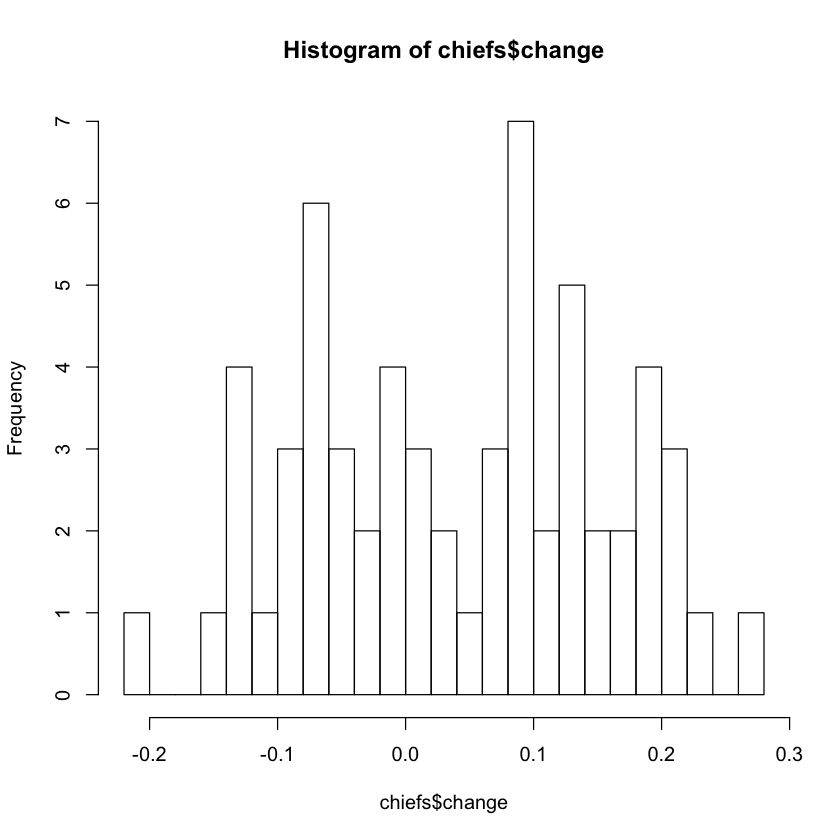

In [25]:
# your one line here
hist(chiefs$change,breaks = 20)

What do you see? Change the breaks and tell me what you see. 

**Tell me what you see**


Now, let's use that logical mask again, this time to find our errant row with missing data and to create a data frame that leaves it out. Call it `chiefs2`. One hint: Using "!" turns TRUE to FALSE and FALSE to TRUE. So the expression below identifies just those rows that *are not* NA's. 

In [26]:
!is.na(chiefs$change)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[61]  TRUE  TRUE

In [29]:
# your one line here
chiefs2 = chiefs[!is.na(chiefs$change),]
head(chiefs2)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16,vc15,change
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,2544,2693,-0.05532863
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,1049,969,0.08255934
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,2162,2184,-0.01007326
Aurora PD,10,7,127,149,287,205,390,317,18,15,814,678,0.20058997
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,1970,1784,0.10426009
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,1563,1993,-0.21575514


Find those cities with a relative increase greater than 10%...

In [30]:
# your one line here
chiefs2[chiefs2$change > 0.1,]

,agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16,vc15,change
4,Aurora PD,10,7,127,149,287,205,390,317,18,15,814,678,0.2005900
5,Austin PD,12,9,328,387,516,446,1114,942,NA,NA,1970,1784,0.1042601
9,Charlotte-Mecklenburg PD,25,27,144,140,912,770,2080,1658,179,109,3161,2595,0.2181118
10,Chicago PD,316,211,677,643,5176,4050,2751,2298,1321,875,8920,7202,0.2385448
16,El Paso PD,8,9,158,154,221,189,967,848,NA,NA,1354,1200,0.1283333
17,Fairfax County PD,7,5,17,12,216,196,98,80,NA,NA,338,293,0.1535836
19,Fresno PD,17,25,52,65,548,473,946,754,95,77,1563,1317,0.1867882
21,Houston PD,158,144,612,368,4764,4772,6059,4916,197,148,11593,10200,0.1365686
22,Indianapolis PD,61,53,232,228,1523,1249,1586,1427,245,190,3402,2957,0.1504904
24,Las Vegas Metropolitan PD,90,56,612,551,1597,1340,956,766,436,347,3255,2713,0.1997788


... and an increase less than 10%.

In [31]:
# your one line here
chiefs2[chiefs2$change < 0.1,]

,agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16,vc15,change
1,Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,2544,2693,-0.05532863
2,Arlington PD,13,4,123,117,245,248,668,600,NA,NA,1049,969,0.08255934
3,Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,2162,2184,-0.01007326
6,Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,1563,1993,-0.21575514
7,Baltimore PD,137,144,137,141,2373,2041,2344,2285,318,282,4991,4611,0.08241162
8,Boston PD,22,13,116,98,659,661,1269,1399,93,100,2066,2171,-0.04836481
11,Cincinnati PD,35,41,127,125,574,598,350,344,189,227,1086,1108,-0.01985560
12,Cleveland PD,47,50,218,286,1285,1394,1075,1118,411,388,2625,2848,-0.07830056
13,Columbus Police,39,48,347,350,963,1105,678,854,160,161,2027,2357,-0.14000849
14,Dallas PD,83,69,381,405,2150,2008,2160,1860,NA,NA,4774,4342,0.09949332


Now, use chiefs2 to create a the percentage change for all the cities taken together. What do you see?

In [32]:
# put your code here

(sum(chiefs2$vc16) - sum(chiefs2$vc15)) / sum(chiefs2$vc15)


[1] 0.05439942

National trends
---------------

The data we've been looking captures just 2015-2016 -- well six months of 2015 and six months of 2016. It is a bit dangerous to make interpretations based on just one year's data. Crime fluctuates naturally from year to year and those fluctuations are best understood in terms of larger overall trends. To assess these trends, we appeal to the Uniform Crime Reports compiled by the FBI. You can [access the raw data here.](https://www.icpsr.umich.edu/icpsrweb/NACJD/series/57) I have a nicer form of the data for you already [loaded on Github](https://github.com/cocteau/lede2018/raw/master/data/ucr_crime_1975_2015.csv). 

Let's bring it into R.

In [ ]:
ucr <- read.csv("https://github.com/cocteau/lede2018/raw/master/data/ucr_crime_1975_2015.csv",as.is=TRUE)
head(ucr)

We've seen simple summaries and graphics for quantitative data. We have various tabular summaries for quantitative data. Here we "table()" the column of years for UCR reports to see how many cities are reporting per year.

In [ ]:
table(ucr$year)

And here we are doing the same by department, to see how many years worth of data we have for each department. It's very regular!

In [ ]:
table(ucr$department_name)

In [ ]:
summary(ucr$violent_crime)

The summary shows a few missing values of violent crime numbers. Pull out the cities missing data on `violent_crime`.

In [ ]:
# your code here
ucr[is.na(ucr$violent_crime),]

Just to make sure we understand the columns, violent crime is meant to be a combination of homicides, rapes, robberies and aggravated assault. Let's form that sum and compare it to the violent crime column in the data set. Useful, but not necessary hint: The command `all()` takes a logical vector and asks "Are all the values TRUE?". If so, it returns TRUE. 

So, create a vector from the data set that represents the category of violent crimes, compare that total to the `violent_crime` column in the data set, testing if they are all equal to each other.

In [ ]:
# your code here
all(ucr$homs_sum + ucr$rob_sum + ucr$rape_sum + ucr$agg_ass_sum == ucr$violent_crime)


Just to be cleaer, let's look at places that have huge crime numbers...

In [ ]:
ucr[ucr$violent_crime > 1000000,]

Or, using dplyr2 verbs...

In [ ]:
filter(ucr,violent_crime>100000)

The extra `NA` rows correspond to the missing data entries in Violent Crime that we found above. R will (bless its heart) just turn the entire row into missing values. That can be annoying in cases when we want `NA`'s to be removed from the table. In the next lecture we'll see some higher-level tools that will do this for us, but for now we can just add to our logical expression and take only those rows where the crime count is not missing and is bigger than 1000000. We join two logical conditions with an "&" for "and" and "|" for "or".

In [ ]:
# your code here
ucr[ ucr$violent_crime > 100000 & !is.na(ucr$violent_crime),]


... ah, there are national totals in this data set. So let's have a look at one municipality. Let's pull the data aside and make some plots!

In [ ]:
miami <- filter(ucr,department_name=="Miami")
miami

In [ ]:
plot(miami$year,miami$violent_per_100k)

In [ ]:
options(repr.plot.width=8,repr.plot.height=4)

plot(miami$year,miami$violent_per_100k,xlab="Year",ylab="Violent Crimes per 100K People",type="l",main="Crime Rate in Miami")
points(miami$year,miami$violent_per_100k,pch=19,cex=0.5)

Create a plot for a city larger than Miami and a plot for a city smaller than Miami.

In [ ]:
# code to pick your city
#
mean(miami$total_pop)

cities <- summarise(group_by(ucr,department_name),mean_pop = mean(total_pop, na.rm=TRUE))

In [ ]:
# code to plot the big city
# 
cities[cities$mean_pop > mean(miami$total_pop), ]

sanantonio  <- filter(ucr,department_name=="San Antonio")
options(repr.plot.width=8,repr.plot.height=4)

plot(sanantonio$year,sanantonio$violent_per_100k,xlab="Year",ylab="VC per 100K People",type="l",main="Crime Rate in San Antonio")
points(sanantonio$year,sanantonio$violent_per_100k,pch=19,cex=0.5)

In [ ]:
# code to plot the smaller city
#
cities[cities$mean_pop < mean(miami$total_pop), ]

cincinnati  <- filter(ucr,department_name=="Cincinnati")
options(repr.plot.width=8,repr.plot.height=4)

plot(cincinnati$year,cincinnati$violent_per_100k,xlab="Year",ylab="VC per 100K People",type="l",main="Crime Rate in cincinnati")
points(cincinnati$year,cincinnati$violent_per_100k,pch=19,cex=0.5)

We'll see some better tools for plotting using ggplot2 next time.

**Short bonus.** See if you can get the data into shape from the Major Cities Chiefs Association for 2016-2017, and update our analysis. The original report that generated the CSV we used [is posted here](https://www.majorcitieschiefs.com/pdf/news/mcca_violent_crime_data_midyear_20162015.pdf). An updated version for 2016-2017 [is posted here](https://www.majorcitieschiefs.com/pdf/news/mcca_violent_crime_report_2017_and_2016_midyear_07312017_update.pdf). Grab the file and see what you can do with it. Remember, I used [Tabula](http://tabula.technology/) to pull the data from the Chiefs' report and convert it to the more usable CSV file we loaded into R. See what you can do to convert the new file and try loading it into R.